In [24]:
from dataclasses import dataclass

@dataclass
class Node:
    feature: int = None
    value: float = None
    left: np.array = None
    right: np.array = None

In [25]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin


class DecisionTreeClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.root = Node()

    @staticmethod
    def _gini(y):
        """Gini impurity."""
        counts = np.bincount(y)
        p = counts / counts.sum()

        return (p*(1-p)).sum()

    def _split(self, X, y):
        """Bruteforce search over all features and splitting points."""
        best_information_gain = float("-inf")
        best_feature = None
        best_split = None

        for feature in range(X.shape[1]):
            split_candidates = np.unique(X[:, feature])
            for split in split_candidates:
                left_mask = X[:, feature] < split
                X_left, y_left = X[left_mask], y[left_mask]
                X_right, y_right = X[~left_mask], y[~left_mask]

                information_gain = self._gini(y) - (
                    len(X_left) / len(X) * self._gini(y_left)
                    + len(X_right) / len(X) * self._gini(y_right)
                )

                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    best_feature = feature
                    best_split = split

        return best_feature, best_split

    def _build_tree(self, X, y):
        """The heavy lifting."""
        feature, split = self._split(X, y)

        left_mask = X[:, feature] < split

        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[~left_mask], y[~left_mask]

        if len(X_left) == 0 or len(X_right) == 0:
            return Node(value=np.argmax(np.bincount(y)))
        else:
            return Node(
                feature,
                split,
                self._build_tree(X_left, y_left),
                self._build_tree(X_right, y_right),
            )

    def _find_path(self, x, node):
        """Given a data point x, walk from the root to the corresponding leaf node."""
        if node.feature == None:
            return node.value
        else:
            if x[node.feature] < node.value:
                return self._find_path(x, node.left)
            else:
                return self._find_path(x, node.right)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)
        return self

    def predict(self, X):
        return np.array([self._find_path(x, self.root) for x in X])


In [120]:
np.random.seed(0)

X = np.random.randn(100, 2)
y = ((X[:, 0] > 0) * (X[:, 1] < 0))

In [121]:
dt = DecisionTreeClassifier().fit(X, y)

In [122]:
dt.score(X, y)

1.0

In [123]:
dt.root

Node(feature=1, value=-0.14963454032767076, left=Node(feature=0, value=0.04575851730144607, left=Node(feature=None, value=0, left=None, right=None), right=Node(feature=None, value=1, left=None, right=None)), right=Node(feature=None, value=0, left=None, right=None))

In [124]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plt.style.use("default")

X = np.random.uniform(0, 1, size=(50, 2))
y = np.random.randint(5, size=50)

In [125]:
dt = DecisionTreeClassifier().fit(X, y)

c:\users\rober\appdata\local\programs\python\python39\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


(-0.1, 1.1)

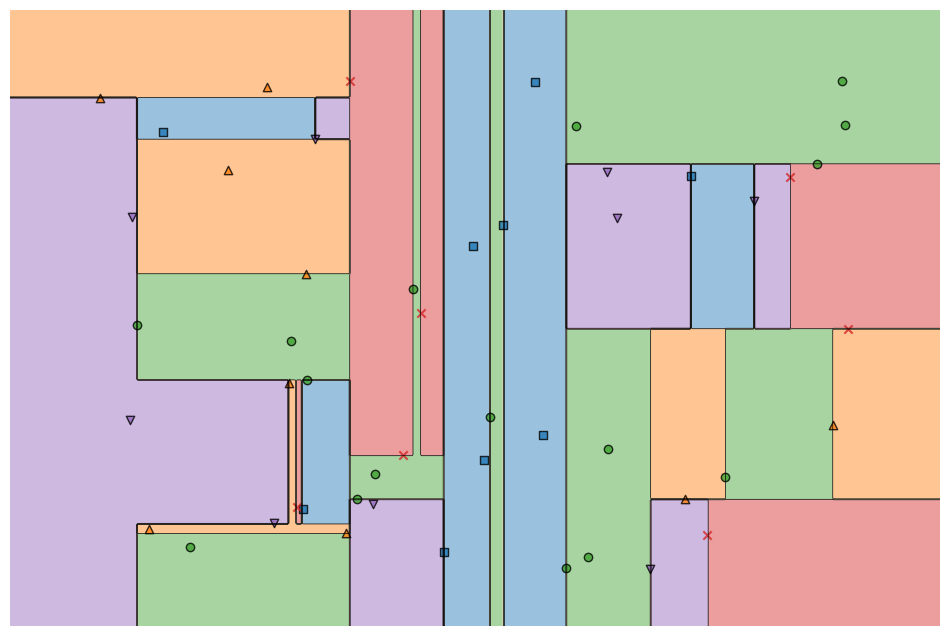

In [126]:
plt.figure(figsize=(12, 8))
plot_decision_regions(X, y, clf=dt, legend=0, hide_spines=True)
plt.axis("off")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

In [115]:
dt.score(X, y)

1.0